In [4]:
import torch

In [5]:
print(torch.__version__)

1.12.0+cpu


In [6]:
import numpy as np
#np.set_printoptions(precision=3)

In [7]:
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

In [8]:
t_a

tensor([1, 2, 3])

In [9]:
t_b

tensor([4, 5, 6], dtype=torch.int32)

In [10]:
a=[1,2,3]
b=np.array([4,5,6],dtype=np.int32)
torch.tensor(a)
torch.from_numpy(b)

tensor([4, 5, 6], dtype=torch.int32)

In [11]:
t_a.shape

torch.Size([3])

In [12]:
t_b.shape

torch.Size([3])

In [13]:
t_ones=torch.ones(2,3)

In [14]:
t_ones.shape

torch.Size([2, 3])

In [15]:
t_ones

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [16]:
rand=torch.rand(2,3)

In [17]:
rand

tensor([[0.3342, 0.9871, 0.7596],
        [0.0235, 0.2364, 0.3238]])

In [18]:
to_int64=t_a.to(torch.int64)

In [19]:
to_int64

tensor([1, 2, 3])

In [20]:
t=torch.zeros(1,2,3)

In [21]:
t

tensor([[[0., 0., 0.],
         [0., 0., 0.]]])

In [22]:
t2=torch.normal(mean=0,std=1,size=(5,3))

In [23]:
t2

tensor([[ 0.1251,  0.3109,  1.5234],
        [ 0.7989, -0.1011,  0.5569],
        [ 0.2200, -0.8156,  1.6698],
        [ 1.2931, -0.9352,  2.9710],
        [ 0.4381,  0.3021,  1.0516]])

In [24]:
t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))

In [25]:
t5

tensor([[-1.6780, -0.2572,  0.4261, -1.4396, -1.4096],
        [ 0.8238, -0.2312,  0.9841,  0.6942,  0.7123],
        [-0.8050,  0.4488, -1.7057, -0.6706, -0.7087],
        [ 1.6543,  0.3308, -0.6781,  1.4220,  1.3853],
        [ 0.8149,  0.1838, -0.4035,  0.7013,  0.6813]])

In [26]:
torch.manual_seed(1)

In [27]:
t=torch.rand(5)

In [28]:
t

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])

In [29]:
t_split=torch.split(t,split_size_or_sections=[3,2])

In [30]:
t_split

(tensor([0.7576, 0.2793, 0.4031]), tensor([0.7347, 0.0293]))

In [31]:
a=torch.ones(3)
b=torch.zeros(3)
c=torch.cat([a,b])

In [32]:
c

tensor([1., 1., 1., 0., 0., 0.])

In [33]:
z=torch.stack([a,b],axis=1)

In [34]:
z

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])

# Building input pipelines in PyTorch

In [35]:
from torch.utils.data import DataLoader
t=torch.arange(6,dtype=torch.float64)
data_loader=DataLoader(t)
for item in data_loader:
    print(item)

tensor([0.], dtype=torch.float64)
tensor([1.], dtype=torch.float64)
tensor([2.], dtype=torch.float64)
tensor([3.], dtype=torch.float64)
tensor([4.], dtype=torch.float64)
tensor([5.], dtype=torch.float64)


In [36]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.], dtype=torch.float64)
batch 2: tensor([3., 4., 5.], dtype=torch.float64)


In [37]:
from torch.utils.data import Dataset
class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [38]:
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)
joint_dataset = JointDataset(t_x, t_y)
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)
for example in joint_dataset:
    print('  x: ', example[0], 
          '  y: ', example[1])

  x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)


In [39]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], '\n         y:', batch[1])       
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], '\n         y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([0, 1])


# Creating a dataset from files on your local storage disk

In [43]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

[]


In [48]:
import matplotlib.pyplot as plt
import os
from PIL import Image
fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

<Figure size 720x360 with 0 Axes>

Text(0, 0.5, 'y')

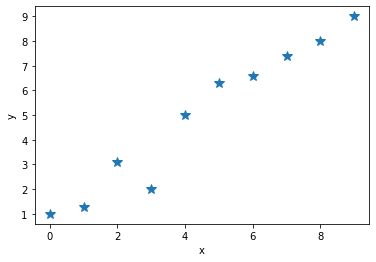

In [51]:
import torch
import numpy as np
import matplotlib.pyplot as plt
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 
                    7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, '*', markersize=10)
plt.xlabel('x')
plt.ylabel('y')